In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

## Create a dataset

In [3]:
X = tf.range(1, 100, 1, tf.float32)
y = X + 10

## Model 1 (single layer)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# tweak the below hyperparameters to see varying training losses
model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0015),
    metrics=["mae", "accuracy"]
)

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 21.4222 - mae: 21.4222 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 830us/step - loss: 6.8253 - mae: 6.8253 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 749us/step - loss: 4.4688 - mae: 4.4688 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 942us/step - loss: 5.2193 - mae: 5.2193 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 802us/step - loss: 4.4651 - mae: 4.4651 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 944us/step - loss: 4.5469 - mae: 4.5469 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 780us/step - loss: 4.2446 - mae: 4.2446 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 954us/step - loss: 6.2473 - mae: 6.2473 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 886us/step

In [13]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# SGD with MAE works but NOT QUITE WELL
# SGD with MSE doesn't work AT ALL
# Adam with MAE or MSE works well
model_1.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mse"]
)

model_1.fit(tf.expand_dims(X, axis=1), y, epochs=600)

Epoch 1/600
4/4 [==============================] - 0s 1ms/step - loss: 61.0951 - mae: 61.0951
Epoch 2/600
4/4 [==============================] - 0s 862us/step - loss: 56.8212 - mae: 56.8212
Epoch 3/600
4/4 [==============================] - 0s 828us/step - loss: 52.6098 - mae: 52.6098
Epoch 4/600
4/4 [==============================] - 0s 818us/step - loss: 48.2537 - mae: 48.2537
Epoch 5/600
4/4 [==============================] - 0s 897us/step - loss: 43.9353 - mae: 43.9353
Epoch 6/600
4/4 [==============================] - 0s 777us/step - loss: 39.5827 - mae: 39.5827
Epoch 7/600
4/4 [==============================] - 0s 885us/step - loss: 35.1751 - mae: 35.1751
Epoch 8/600
4/4 [==============================] - 0s 738us/step - loss: 30.8426 - mae: 30.8426
Epoch 9/600
4/4 [==============================] - 0s 866us/step - loss: 26.3834 - mae: 26.3834
Epoch 10/600
4/4 [==============================] - 0s 834us/step - loss: 21.9507 - mae: 21.9507
Epoch 11/600
4/4 [=======================

**Multiple units/2 layer model observations**

1. learning rate to a lot extent affects quick or linearly decreasing of training losses
2. Adam optimizer is a LOT better than SGD
3. Adam seems to be more gradual and it can be clearly seen how adam steps
4. MSE loss is a lot better than MAE loss but requires A LOT of epochs

In [6]:
X_1 = tf.range(1, 100, 1, tf.float32)
y_1 = X_1 ** 2 + 1

In [7]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics=["mae"]
)

model_2.fit(tf.expand_dims(X, axis=1), y, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 39.1451 - mae: 39.1451
Epoch 2/500
4/4 [==============================] - 0s 899us/step - loss: 36.5730 - mae: 36.5730
Epoch 3/500
4/4 [==============================] - 0s 815us/step - loss: 33.9876 - mae: 33.9876
Epoch 4/500
4/4 [==============================] - 0s 872us/step - loss: 31.3975 - mae: 31.3975
Epoch 5/500
4/4 [==============================] - 0s 781us/step - loss: 28.7863 - mae: 28.7863
Epoch 6/500
4/4 [==============================] - 0s 772us/step - loss: 26.1532 - mae: 26.1532
Epoch 7/500
4/4 [==============================] - 0s 757us/step - loss: 23.5371 - mae: 23.5371
Epoch 8/500
4/4 [==============================] - 0s 730us/step - loss: 20.9830 - mae: 20.9830
Epoch 9/500
4/4 [==============================] - 0s 739us/step - loss: 18.3736 - mae: 18.3736
Epoch 10/500
4/4 [==============================] - 0s 743us/step - loss: 15.7745 - mae: 15.7745
Epoch 11/500
4/4 [=======================

🌟 Tuning Adam for more layers, learning to get it just right in loss reduction and epochs to get the loss reduction time to minimize

> TODO: try making the X data in negatives too like -100 to 100 and seeing effectiveness of the models

In [8]:
X_test = tf.range(100, 200, 1, tf.float32)
y_test = X_test + 10

4/4 [==============================] - 0s 548us/step


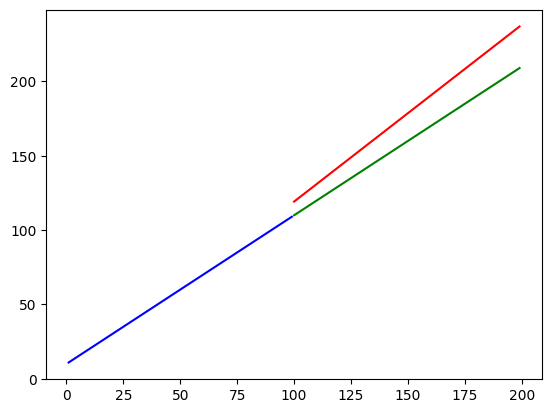

In [9]:
# model predictions

y_pred = model.predict(X_test)
y_pred = tf.squeeze(y_pred)

plt.plot(X, y, c="b")
plt.plot(X_test, y_test, c="g")
plt.plot(X_test, y_pred, c="r")

4/4 [==============================] - 0s 692us/step


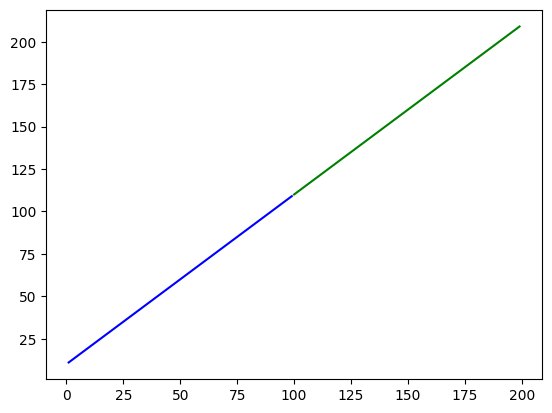

In [10]:
# model_1 predictions

y_pred_1 = model_1.predict(X_test)
y_pred_1 = tf.squeeze(y_pred_1)

plt.plot(X, y, c="b")
plt.plot(X_test, y_test, c="g")
plt.plot(X_test, y_pred_1, c="r")

4/4 [==============================] - 0s 684us/step


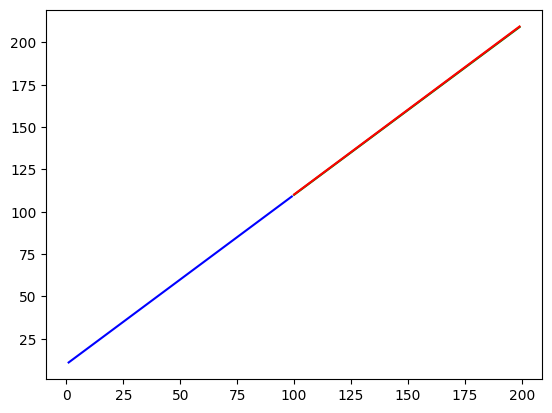

In [11]:
# model_2 predictions

y_pred_2 = model_2.predict(X_test)
y_pred_2 = tf.squeeze(y_pred_2)

plt.plot(X, y, c="b")
plt.plot(X_test, y_test, c="g")
plt.plot(X_test, y_pred_2, c="r")